In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)

X = dataset.iloc[:, :-1].values     # features
y = dataset.iloc[:, 4].values       # labels

#### Data Split

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### Show Pairplot

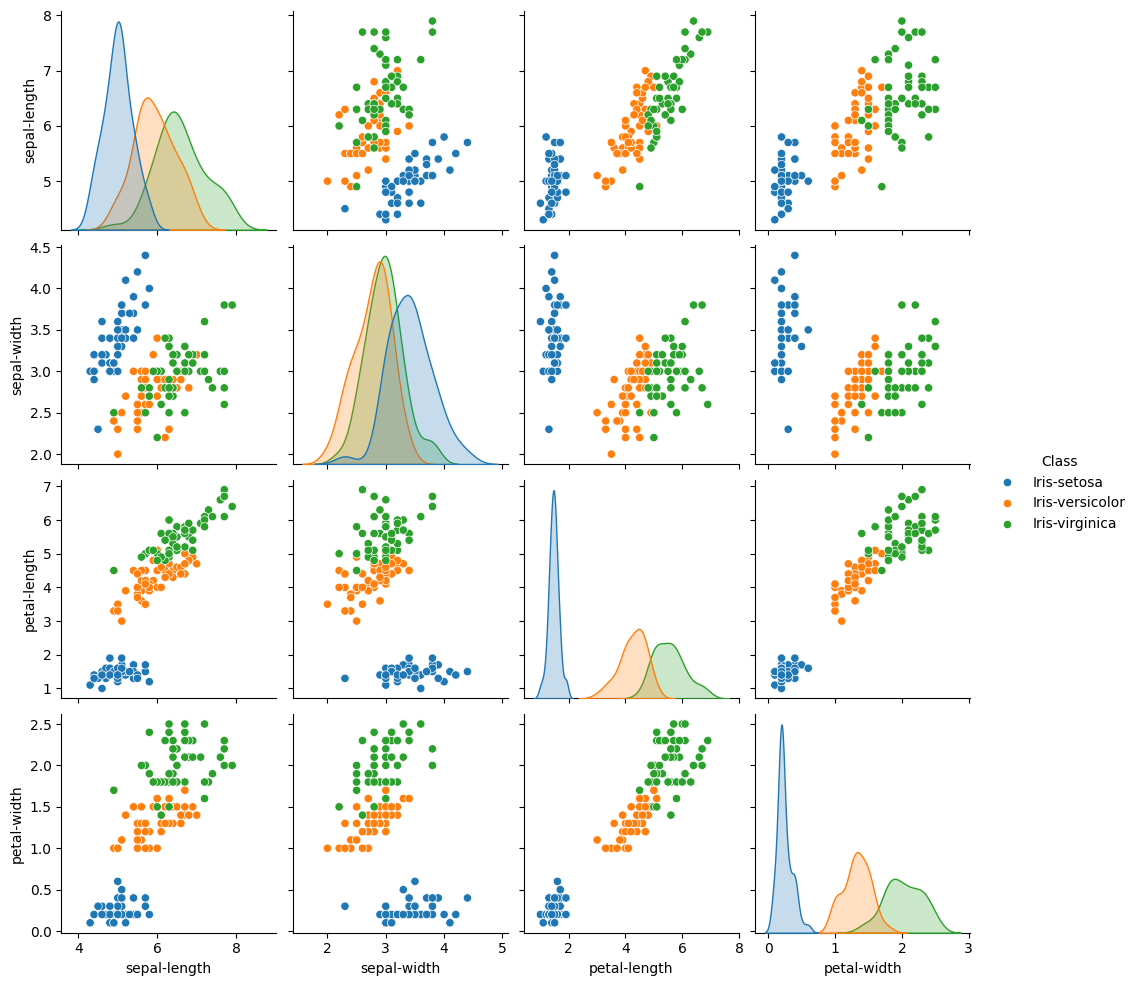

In [3]:
sns.pairplot(dataset, hue='Class')
plt.show()

#### Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Find the best K

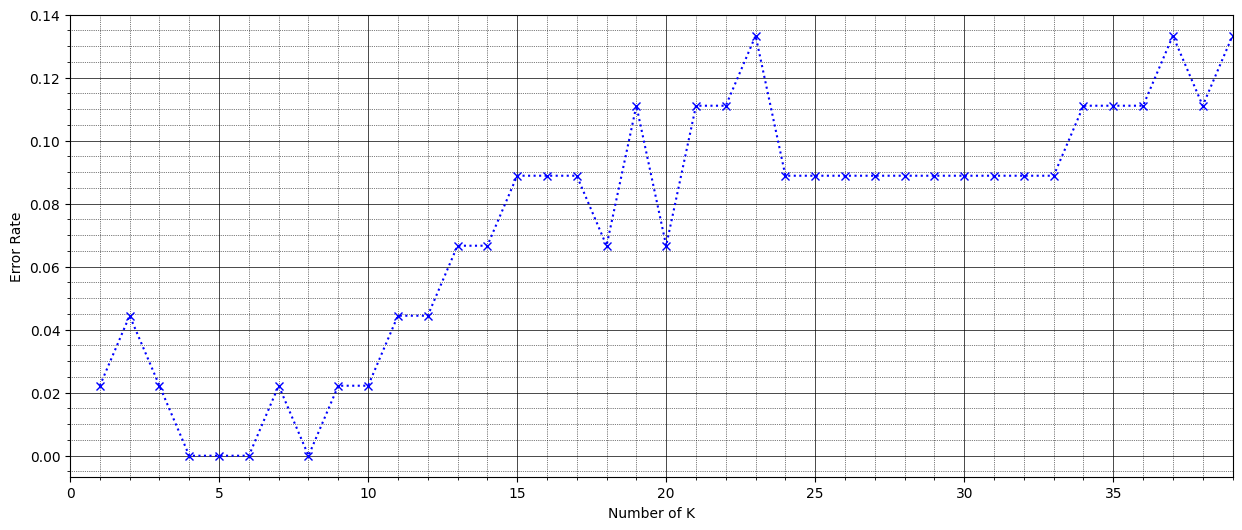

The optimal number of neighbors is 4


In [5]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(15,6))
plt.plot(range(1,40),error_rate, color='blue', linestyle='dotted', marker='x')
plt.xlabel('Number of K')
plt.ylabel('Error Rate')
plt.xlim([0, max(range(1,40))])
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')  # Major grid lines
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')  # Minor grid lines
plt.show()

# This line prints the index with the lowest error rate
best_k = error_rate.index(min(error_rate))+1
print(f'The optimal number of neighbors is {best_k}')

#### Training and Predictions

In [6]:
classifier = KNeighborsClassifier(n_neighbors=best_k)
classifier.fit(X_train, y_train);

#### Predict

In [7]:
y_pred = classifier.predict(X_test)

#### Algorithm Evaluation

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        19
 Iris-virginica       1.00      1.00      1.00        15

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



Precision: This is the ratio of correctly predicted positive observations to the total predicted positives. High precision relates to the low false positive rate. For example, the precision for ‘Iris-setosa’ is 1.00, meaning that every time the model predicted an Iris to be ‘setosa’, it was correct 100% of the time.

Recall (Sensitivity): This is the ratio of correctly predicted positive observations to the all observations in actual class. For example, the recall for ‘Iris-virginica’ is 0.92, meaning that the model correctly identified 92% of all ‘Iris-virginica’ in the dataset.

F1 score: This is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. It is a good way to show that a classifer has a good value for both recall and precision. For example, the F1 score for ‘Iris-versicolor’ is 0.96, indicating a balance between precision and recall.

Support: This is the number of samples of the true response that lie in that class. For example, there are 19 ‘Iris-setosa’ flowers in the dataset.

The ‘accuracy’ is the ratio of correctly predicted observation to the total observations, which is 0.98 in your case. This means the model was correct 98% of the time.

The ‘macro avg’ calculates the metric independently for each class and then takes the average, treating all classes equally. The ‘weighted avg’ calculates metrics for each label, and finds their average weighted by the number of true instances for each label.

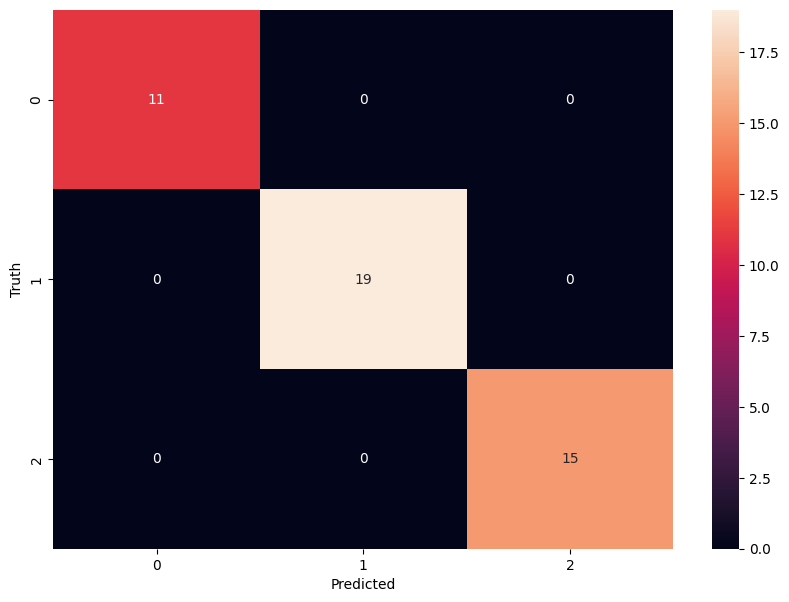

In [9]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()